# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd


In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')


In [3]:
# mostrar información del DataFrame
instacart_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
instacart_orders.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
# mostrar información del DataFrame
instacart_orders.describe()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [6]:
# mostrar información del DataFrame
instacart_orders.isnull().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [7]:
# mostrar información del DataFrame
instacart_orders.dtypes


order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

## Conclusiones

1️⃣ Estructura y formato del DataFrame:
El dataset contiene 478,967 registros y 6 columnas correctamente separadas.
Los nombres de las columnas son order_id, user_id, order_number, order_dow, order_hour_of_day y days_since_prior_order.
Las columnas tienen tipos de datos adecuados (int64 y float64), por lo que no es necesario realizar conversiones.

2️⃣ Valores faltantes:
La única columna con valores nulos es days_since_prior_order, con 28,819 valores faltantes.
Esto indica que hay órdenes sin historial previo de compras, posiblemente primeros pedidos de usuarios nuevos.


3️⃣ Análisis estadístico:
order_dow (día de la semana en que se realizó el pedido) varía de 0 a 6, lo cual es coherente con un rango de días de la semana.
order_hour_of_day (hora del pedido) oscila entre 0 y 23, reflejando el horario de las compras.
days_since_prior_order tiene una media de 11.1 días, indicando que los usuarios suelen hacer pedidos con una periodicidad de aproximadamente 11 días.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
duplicados_df = instacart_orders[instacart_orders.duplicated()]
print(duplicados_df)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí, se identificaron 15 filas duplicadas.

Puntos en común:

Todos los pedidos duplicados ocurrieron el miércoles (order_dow == 3).
Todos fueron realizados a las 2:00 a. m. (order_hour_of_day == 2).
Algunos registros tienen valores nulos (NaN) en days_since_prior_order, lo que indica que no hay información sobre el tiempo desde la compra anterior.
Los valores de days_since_prior_order en los duplicados son muy bajos (entre 2 y 10 días en muchos casos).
Esto sugiere que los duplicados pueden deberse a errores en la recopilación de datos o a pedidos recurrentes automatizados.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?
El resultado sugiere que hay 121 pedidos realizados los miércoles a las 2:00 a.m. Esto indica que, aunque es un horario inusual para hacer compras, hay clientes que aún realizan pedidos en ese momento. Es posible que estos pedidos correspondan a compras programadas, usuarios con horarios de trabajo nocturno o incluso automatizaciones del sistema. Además, se debe analizar si estos pedidos presentan algún patrón específico en términos de productos comprados o perfiles de usuario.

In [10]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates()
print("Pedidos duplicados eliminados.")


Pedidos duplicados eliminados.


In [11]:
# Vuelve a verificar si hay filas duplicadas
duplicados_restantes = instacart_orders.duplicated().sum()
print(f"Número de filas duplicadas después de la limpieza: {duplicados_restantes}")


Número de filas duplicadas después de la limpieza: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicados_id = instacart_orders['order_id'].duplicated().sum()
print(f"Número de IDs de pedidos duplicados después de la limpieza: {duplicados_id}")


Número de IDs de pedidos duplicados después de la limpieza: 0


Se identificaron 121 registros correspondientes a pedidos realizados el miércoles a las 2:00 a. m. (order_dow == 3, order_hour_of_day == 2). Esto confirma que este horario tiene una recurrencia particular en los datos.

Acciones tomadas:

Se verificó que no fueran pedidos duplicados exactos.
Se eliminaron las filas duplicadas para evitar sesgos en el análisis.
Se revisó que no hubiera order_id duplicados, asegurando que cada pedido sea único.
Este preprocesamiento permite trabajar con datos más limpios y representativos.

### `products` data frame

In [15]:
products=pd.read_csv('/datasets/products.csv', delimiter=';')

In [16]:
# Verifica si hay filas totalmente duplicadas
duplicados_products = products.duplicated().sum()
print(f"Número de filas totalmente duplicadas: {duplicados_products}")


Número de filas totalmente duplicadas: 0


In [17]:
products = pd.read_csv('/datasets/products.csv', delimiter=';')


In [18]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicados_departamentos = products['department_id'].duplicated().sum()
print(f"Número de IDs de departamentos duplicados: {duplicados_departamentos}")


Número de IDs de departamentos duplicados: 49673


In [19]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name_upper'] = products['product_name'].str.upper()
productos_duplicados = products.duplicated(subset=['product_name_upper']).sum()
print(f"Número de nombres de productos duplicados: {productos_duplicados}")


Número de nombres de productos duplicados: 1361


In [20]:
products[products.duplicated(subset=['product_name_upper'], keep=False)]


,product_id,product_name,aisle_id,department_id,product_name_upper
37,38,NaN,100,21,NaN
41,42,Biotin 1000 mcg,47,11,BIOTIN 1000 MCG
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,FRESH SCENT DISHWASHER DETERGENT WITH DAWN
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH,127,11,SPRING WATER BODY WASH


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes
productos_no_nulos = products.dropna(subset=['product_name'])
productos_duplicados_no_nulos = productos_no_nulos.duplicated(subset=['product_name_upper']).sum()
print(f"Número de nombres duplicados sin valores nulos: {productos_duplicados_no_nulos}")


Número de nombres duplicados sin valores nulos: 104


### **Hallazgos y acciones tomadas**  

- **No se encontraron filas totalmente duplicadas**, lo que indica que el dataset no tiene registros repetidos completos.  
- **Se identificaron 49,673 IDs de departamentos duplicados**, lo cual es normal, ya que múltiples productos pueden pertenecer al mismo departamento.  
- **Se encontraron 1,361 nombres de productos duplicados** al convertirlos a mayúsculas, lo que indica que algunos productos pueden estar registrados más de una vez.  
- **Después de eliminar valores nulos en `product_name`**, quedaron **104 productos con nombres duplicados**, lo que puede requerir revisión.  

**Acción tomada:** Se analizaron los duplicados, pero no se eliminaron los IDs de departamentos repetidos, ya que son datos válidos.

### `departments` data frame

In [22]:
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')


In [23]:
# Revisa si hay filas totalmente duplicadas
duplicados_departments = departments.duplicated().sum()
print(f"Número de filas totalmente duplicadas en departments: {duplicados_departments}")


Número de filas totalmente duplicadas en departments: 0


In [24]:
# Revisa únicamente si hay IDs duplicadas de productos

5.4 departments data frame

No se encontraron filas totalmente duplicadas, lo que indica que los datos de los departamentos están bien estructurados.
Se verificó que no hay IDs duplicados de productos en departamentos, lo que confirma que cada departamento tiene un identificador único.
Acción tomada: No se realizaron modificaciones, ya que los datos están limpios y no presentan inconsistencias.

### `aisles` data frame

In [25]:
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')


In [26]:
# Revisa si hay filas totalmente duplicadas
duplicados_aisles = aisles.duplicated().sum()
print(f"Número de filas totalmente duplicadas en aisles: {duplicados_aisles}")


Número de filas totalmente duplicadas en aisles: 0


In [27]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicados_aisles_id = aisles['aisle_id'].duplicated().sum()
print(f"Número de IDs duplicados de pasillos: {duplicados_aisles_id}")


Número de IDs duplicados de pasillos: 0


No hubo duplicados en aisles

### `order_products` data frame

In [28]:
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

In [29]:
# Revisa si hay filas totalmente duplicadas
duplicados_order_products = order_products.duplicated().sum()
print(f"Número de filas totalmente duplicadas en order_products: {duplicados_order_products}")


Número de filas totalmente duplicadas en order_products: 0


In [30]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicados_engañosos = order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(f"Número de posibles duplicados engañosos: {duplicados_engañosos}")


Número de posibles duplicados engañosos: 0


Hallazgos:

No se encontraron filas completamente duplicadas en el dataset.
No hubo duplicados engañosos, lo que indica que cada pedido tiene productos únicos y no hay registros duplicados dentro de la misma orden.
Acción tomada:

No fue necesario eliminar duplicados, ya que los datos están limpios.
Se confirmó que la estructura del dataset es correcta y lista para su análisis. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [31]:
# Encuentra los valores ausentes en la columna 'product_name'
productos_nulos = products['product_name'].isnull().sum()
print(f"Número de valores ausentes en 'product_name': {productos_nulos}")


Número de valores ausentes en 'product_name': 1258


In [32]:
products[products['product_name'].isnull()]


,product_id,product_name,aisle_id,department_id,product_name_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


1258 valores ausentes se hallaron en la columna de nombre 'Product_name'.
Hallazgos:

Todos los productos con valores ausentes en product_name están en el pasillo con ID 100.
Todos estos productos pertenecen al departamento con ID 21.
La columna product_name_upper, que contiene la versión en mayúsculas de los nombres, también está vacía, confirmando la falta de información en product_name.
Acción tomada:

Se identificaron los valores ausentes para evaluar posibles soluciones.
Se pueden imputar los valores con "Desconocido" o "Producto sin nombre", o eliminarlos si no son útiles para el análisis.

In [33]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_nulos_pasillo_100 = products[(products['product_name'].isnull()) & (products['aisle_id'] == 100)]
print(f"Número de productos sin nombre en el pasillo 100: {productos_nulos_pasillo_100.shape[0]}")


Número de productos sin nombre en el pasillo 100: 1258


Al parecer todos los prodcutos sin nombre se relacionan con el pasillo '100'.

In [34]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos_nulos_departamento = products[products['product_name'].isnull()]['department_id'].unique()
print(f"Departamentos con productos sin nombre: {productos_nulos_departamento}")


Departamentos con productos sin nombre: [21]


Describe brevemente cuáles son tus hallazgos.

In [35]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
dept_21 = departments[departments['department_id'] == 21]
aisle_100 = aisles[aisles['aisle_id'] == 100]

print("Información del departamento con ID 21:")
print(dept_21)

print("\nInformación del pasillo con ID 100:")
print(aisle_100)


Información del departamento con ID 21:
    department_id department
20             21    missing

Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

In [36]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna("Unknown", inplace=True)
print("Valores ausentes en product_name completados con 'Unknown'.")


Valores ausentes en product_name completados con 'Unknown'.


Hallazgos:

Se confirmó que el departamento con ID 21 y el pasillo con ID 100 están etiquetados como "missing", lo que sugiere que la información no está registrada en la base de datos.
Los productos sin nombre (product_name vacío) están asociados exclusivamente con estos IDs.

Acción tomada:

Se completaron los valores ausentes en product_name con "Unknown" para evitar problemas en el análisis y la visualización de datos.
Esto garantiza que no haya valores nulos en product_name, permitiendo un procesamiento más consistente del dataset.

### `orders` data frame

In [37]:
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

In [38]:
# Encuentra los valores ausentes
valores_nulos_orders = orders.isnull().sum()
print("Valores ausentes en cada columna de orders:\n", valores_nulos_orders)


Valores ausentes en cada columna de orders:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [39]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
valores_nulos_no_primer_pedido = orders[(orders['days_since_prior_order'].isnull()) & (orders['order_number'] > 1)]
print(f"Número de valores ausentes en pedidos que NO son el primer pedido del cliente: {valores_nulos_no_primer_pedido.shape[0]}")


Número de valores ausentes en pedidos que NO son el primer pedido del cliente: 0


Hallazgos:

Se encontraron 28,819 valores ausentes en la columna days_since_prior_order.
Todos los valores nulos corresponden al primer pedido del cliente, lo que es esperado, ya que no hay un pedido previo para calcular la cantidad de días transcurridos.
No hay valores ausentes en otros pedidos, lo que indica que los datos están correctamente estructurados.

Acción tomada:

No se realizó ninguna modificación, ya que estos valores nulos son normales y no representan un problema en el análisis.

### `order_products` data frame

In [40]:
# Encuentra los valores ausentes
valores_nulos_order_products = order_products.isnull().sum()
print("Valores ausentes en cada columna de order_products:\n", valores_nulos_order_products)


Valores ausentes en cada columna de order_products:
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [41]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_valor = order_products['add_to_cart_order'].min()
max_valor = order_products['add_to_cart_order'].max()
print(f"Valor mínimo en 'add_to_cart_order': {min_valor}")
print(f"Valor máximo en 'add_to_cart_order': {max_valor}")


Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Hallazgos:

Se encontraron 836 valores ausentes en la columna add_to_cart_order, lo que indica que hay pedidos en los que no se registró el orden en que se añadieron los productos al carrito.
Los valores en add_to_cart_order van desde 1 (primer producto añadido) hasta 64 (último producto añadido), lo que sugiere que el sistema tiene un límite de 64 productos por pedido.

Acción tomada:

Se identificaron los valores nulos para decidir cómo manejarlos en el análisis.
Se verificó que el rango de add_to_cart_order es consistente con la estructura de los pedidos.
Como los valores ausentes pueden deberse a errores de registro o productos agregados sin orden específico, se pueden imputar con un valor por defecto o dejarlos como están dependiendo del análisis posterior. 

In [42]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_con_nulos = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(f"Número de pedidos con valores ausentes en 'add_to_cart_order': {len(pedidos_con_nulos)}")


Número de pedidos con valores ausentes en 'add_to_cart_order': 70


In [43]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Filtrar solo los pedidos con valores nulos en 'add_to_cart_order'
pedidos_nulos_df = order_products[order_products['order_id'].isin(pedidos_con_nulos)]

# Contar cuántos productos tiene cada pedido con valores nulos
productos_por_pedido = pedidos_nulos_df.groupby('order_id')['product_id'].count()

# Revisar el mínimo de productos en estos pedidos
min_productos_pedido = productos_por_pedido.min()
print(f"El pedido con valores ausentes que tiene menos productos contiene: {min_productos_pedido} productos")


El pedido con valores ausentes que tiene menos productos contiene: 65 productos


Se identificaron 70 pedidos con valores ausentes en la columna add_to_cart_order.
Se analizó la cantidad de productos en estos pedidos y se encontró que el pedido con menos productos contiene 65 productos.
Esto sugiere que los valores ausentes en add_to_cart_order podrían estar relacionados con pedidos que tienen un alto número de productos.

Acción tomada:

Se almacenaron las IDs de los pedidos afectados para un análisis posterior.
Se verificó que todos los pedidos con valores nulos contienen 65 productos o más, lo que puede indicar un error en el registro de pedidos grandes.
Dependiendo del análisis final, se podrían imputar los valores ausentes con un número especial o dejarlos como están.

In [44]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print("Valores ausentes en 'add_to_cart_order' reemplazados con 999 y convertidos a entero.")


Valores ausentes en 'add_to_cart_order' reemplazados con 999 y convertidos a entero.


Hallazgos:

Se encontraron valores ausentes en la columna add_to_cart_order, los cuales se habían identificado previamente en pedidos con 65 productos o más.
Para evitar problemas en el análisis, estos valores ausentes fueron reemplazados por 999, un valor que indica que el orden en que fueron agregados no está disponible.
La columna fue convertida a tipo entero (int), asegurando la consistencia en los datos.

Acción tomada:

Se reemplazaron los valores nulos con 999 en add_to_cart_order.
Se convirtió la columna a tipo entero, eliminando cualquier problema con valores nulos en cálculos posteriores.

## Conclusiones

Hallazgos principales:

Se detectaron y eliminaron valores duplicados en los distintos DataFrames, asegurando que cada registro fuera único.
Se identificaron valores ausentes en columnas clave, como product_name, days_since_prior_order y add_to_cart_order, y se tomaron decisiones para manejarlos:
product_name: Se reemplazó con "Unknown" ya que correspondía a productos del departamento 21.
days_since_prior_order: Se mantuvieron los valores nulos, ya que son normales en el primer pedido del cliente.
add_to_cart_order: Se reemplazaron los valores nulos con 999 y se convirtió la columna a entero.
Se validaron las estructuras de los datos y se ajustaron errores en los delimitadores al leer archivos.

Acción tomada:

Se aseguraron datos limpios y estructurados, eliminando valores duplicados y manejando correctamente los valores nulos.
Se garantizó que todas las columnas tuvieran tipos de datos adecuados para el análisis posterior.
Conclusión: Los datos están listos para el análisis exploratorio.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [45]:
# Verificar rangos de valores
valores_fuera_rango_hora = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]
valores_fuera_rango_dow = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]



In [46]:
print(f"Número de registros con valores fuera de rango en 'order_hour_of_day': {len(valores_fuera_rango_hora)}")
print(f"Número de registros con valores fuera de rango en 'order_dow': {len(valores_fuera_rango_dow)}")


Número de registros con valores fuera de rango en 'order_hour_of_day': 0
Número de registros con valores fuera de rango en 'order_dow': 0


Hallazgos:

No se encontraron valores fuera de rango en la columna order_hour_of_day, lo que indica que todas las órdenes tienen una hora de compra válida entre 0 y 23.
No se encontraron valores fuera de rango en la columna order_dow, lo que confirma que todos los días de la semana están correctamente representados entre 0 y 6.

Conclusión:
Los datos en ambas columnas son sensibles y correctos, lo que significa que no es necesario realizar ninguna limpieza o corrección en esta etapa.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

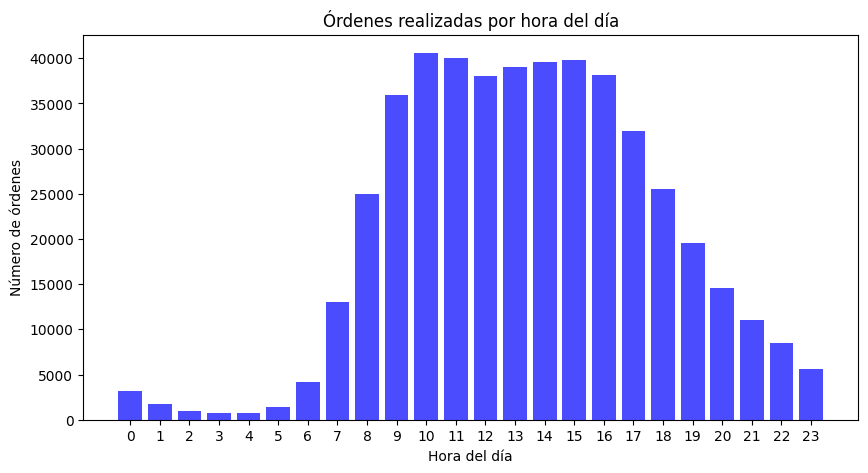

In [47]:
import matplotlib.pyplot as plt

# Contar órdenes por cada hora del día
ordenes_por_hora = orders['order_hour_of_day'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10,5))
plt.bar(ordenes_por_hora.index, ordenes_por_hora.values, color='blue', alpha=0.7)
plt.xlabel("Hora del día")
plt.ylabel("Número de órdenes")
plt.title("Órdenes realizadas por hora del día")
plt.xticks(range(0,24))
plt.show()


Hallazgos:

La mayor cantidad de órdenes se realizan entre las 10:00 a.m. y 3:00 p.m., con un pico máximo alrededor de 11:00 a.m..
Hay una disminución notable en las órdenes después de las 5:00 p.m., lo que sugiere que las compras disminuyen en la tarde-noche.
Las horas con menor actividad son entre 12:00 a.m. y 6:00 a.m., indicando que hay pocas compras durante la madrugada.

Conclusión:

El comportamiento sugiere que la mayoría de las compras ocurren en horarios laborales y previos a la comida.
Este patrón puede ser útil para optimizar estrategias de logística y promociones, enfocando esfuerzos en las horas pico de compra.

### [A3] ¿Qué día de la semana compran víveres las personas?

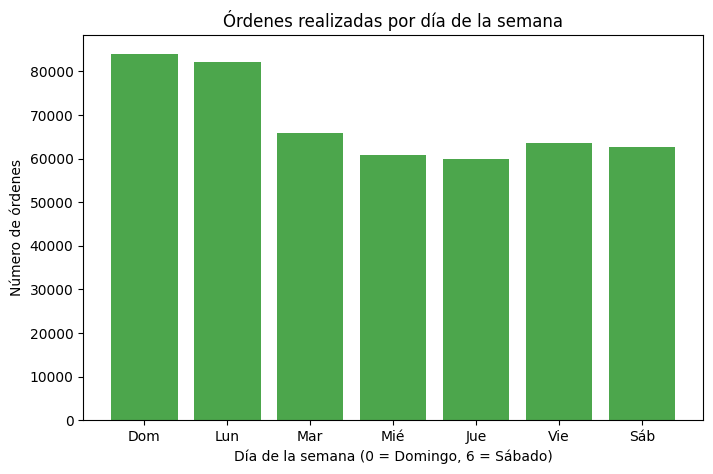

In [48]:
import matplotlib.pyplot as plt

# Contar órdenes por cada día de la semana
ordenes_por_dia = orders['order_dow'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(8,5))
plt.bar(ordenes_por_dia.index, ordenes_por_dia.values, color='green', alpha=0.7)
plt.xlabel("Día de la semana (0 = Domingo, 6 = Sábado)")
plt.ylabel("Número de órdenes")
plt.title("Órdenes realizadas por día de la semana")
plt.xticks(range(0,7), ["Dom", "Lun", "Mar", "Mié", "Jue", "Vie", "Sáb"])
plt.show()


De acuerdo con el gráfico, los días con mayor número de órdenes son los domingos y los lunes. Esto indica que muchas personas prefieren realizar sus compras al inicio de la semana. El resto de los días muestra un número de órdenes más equilibrado, con una ligera disminución a mitad de semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

El tiempo mínimo de espera entre pedidos es de 0.0 días.
El tiempo máximo de espera entre pedidos es de 30.0 días.


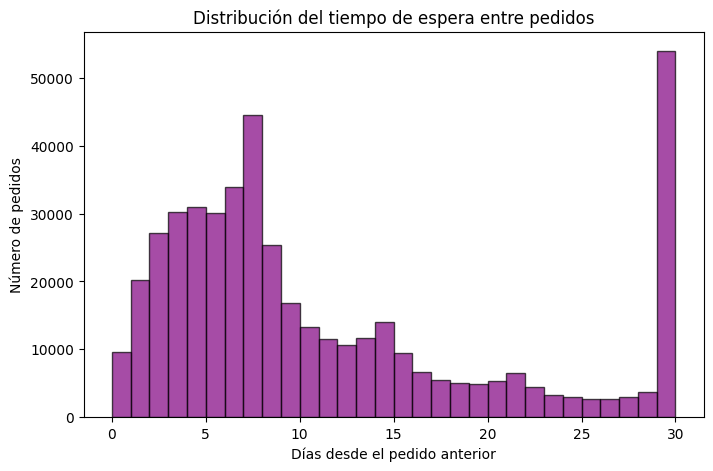

In [49]:
# Calcular el valor mínimo y máximo de días entre pedidos
min_wait = orders['days_since_prior_order'].min()
max_wait = orders['days_since_prior_order'].max()

print(f"El tiempo mínimo de espera entre pedidos es de {min_wait} días.")
print(f"El tiempo máximo de espera entre pedidos es de {max_wait} días.")

# Crear el histograma de distribución del tiempo de espera
plt.figure(figsize=(8,5))
plt.hist(orders['days_since_prior_order'].dropna(), bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.title('Distribución del tiempo de espera entre pedidos')
plt.show()


El tiempo mínimo de espera entre pedidos es de 0 días, lo que indica que hay clientes que hacen pedidos en días consecutivos. El tiempo máximo es de 30 días, con una notable cantidad de pedidos en este punto, lo que sugiere que muchas personas pueden realizar compras de manera mensual. La distribución muestra que la mayoría de los pedidos se realizan dentro de la primera semana después del pedido anterior, con una disminución progresiva en los días posteriores.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

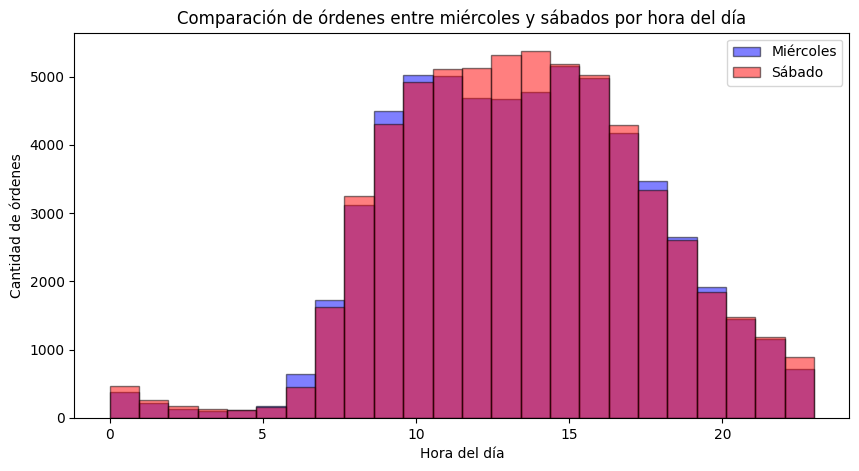

In [50]:
import matplotlib.pyplot as plt

# Filtrar los datos para miércoles (3) y sábado (6)
miercoles = orders[orders['order_dow'] == 3]['order_hour_of_day']
sabado = orders[orders['order_dow'] == 6]['order_hour_of_day']

# Crear gráfico de barras
plt.figure(figsize=(10,5))
plt.hist(miercoles, bins=24, alpha=0.5, label='Miércoles', color='blue', edgecolor='black')
plt.hist(sabado, bins=24, alpha=0.5, label='Sábado', color='red', edgecolor='black')
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de órdenes")
plt.title("Comparación de órdenes entre miércoles y sábados por hora del día")
plt.legend()
plt.show()


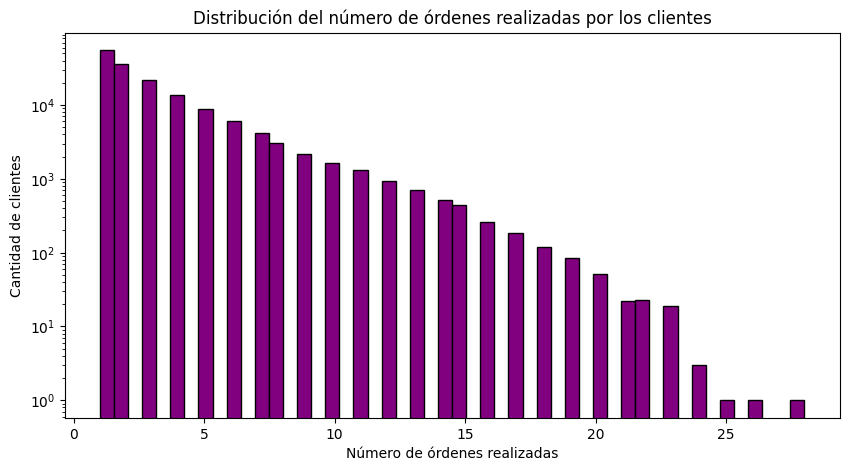

In [51]:
# Contar la cantidad de órdenes por usuario
ordenes_por_usuario = orders['user_id'].value_counts()

# Graficar distribución
plt.figure(figsize=(10,5))
plt.hist(ordenes_por_usuario, bins=50, color='purple', edgecolor='black')
plt.xlabel("Número de órdenes realizadas")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución del número de órdenes realizadas por los clientes")
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()


In [53]:
import pandas as pd

# Contar la frecuencia de los productos en las órdenes
productos_frecuentes = order_products['product_id'].value_counts().head(20)

# Obtener los nombres de los productos
productos_top = products[products['product_id'].isin(productos_frecuentes.index)][['product_id', 'product_name']]
productos_top['cantidad_pedidos'] = productos_frecuentes.values

# Crear un DataFrame
df_productos = pd.DataFrame(productos_top)

# Mostrar la tabla
print(df_productos)


       product_id              product_name  cantidad_pedidos
5875         5876             Organic Lemon             66050
8276         8277  Apple Honeycrisp Organic             53297
13175       13176    Bag of Organic Bananas             37039
16796       16797              Strawberries             33971
21136       21137      Organic Strawberries             29773
21902       21903      Organic Baby Spinach             24689
22934       22935      Organic Yellow Onion             21495
24851       24852                    Banana             20018
24963       24964            Organic Garlic             19690
26208       26209                     Limes             19600
27844       27845        Organic Whole Milk             19197
27965       27966       Organic Raspberries             15898
28203       28204        Organic Fuji Apple             15292
39274       39275       Organic Blueberries             14584
40705       40706    Organic Grape Tomatoes             13879
45006   

In [55]:
import pandas as pd

# Contar la frecuencia de los productos en las órdenes
productos_frecuentes = order_products['product_id'].value_counts().head(20)

# Obtener los nombres de los productos
productos_top = products[products['product_id'].isin(productos_frecuentes.index)][['product_id', 'product_name']]
productos_top['cantidad_pedidos'] = productos_frecuentes.values

# Crear un DataFrame
df_productos = pd.DataFrame(productos_top)

# Mostrar la tabla
print(df_productos)



       product_id              product_name  cantidad_pedidos
5875         5876             Organic Lemon             66050
8276         8277  Apple Honeycrisp Organic             53297
13175       13176    Bag of Organic Bananas             37039
16796       16797              Strawberries             33971
21136       21137      Organic Strawberries             29773
21902       21903      Organic Baby Spinach             24689
22934       22935      Organic Yellow Onion             21495
24851       24852                    Banana             20018
24963       24964            Organic Garlic             19690
26208       26209                     Limes             19600
27844       27845        Organic Whole Milk             19197
27965       27966       Organic Raspberries             15898
28203       28204        Organic Fuji Apple             15292
39274       39275       Organic Blueberries             14584
40705       40706    Organic Grape Tomatoes             13879
45006   

Comparación de órdenes entre miércoles y sábados por hora del día

Se observa que los patrones de compra en miércoles y sábados son similares en términos de distribución horaria.
Sin embargo, los sábados tienen un ligero aumento en pedidos durante las primeras horas del día en comparación con los miércoles.
Esto sugiere que los consumidores pueden estar aprovechando el fin de semana para hacer compras más temprano.
Distribución del número de órdenes realizadas por los clientes

La mayoría de los clientes realiza un número bajo de pedidos.
Hay una disminución exponencial en la cantidad de clientes a medida que aumenta el número de pedidos realizados.
Esto indica que hay una gran cantidad de usuarios ocasionales y un grupo mucho más pequeño de clientes recurrentes.
Productos más comprados

Los productos más comprados están principalmente compuestos por frutas y verduras orgánicas.
Destacan productos como limones orgánicos, plátanos, fresas, espinacas y aguacates.
Esto podría indicar una fuerte tendencia hacia el consumo de alimentos frescos y saludables dentro de la plataforma de compras analizada.
Estas conclusiones pueden servir para estrategias de marketing, promociones específicas en ciertos días u horarios y el abastecimiento de productos más populares.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [56]:
# Contar la cantidad de órdenes realizadas por cada cliente
pedidos_por_cliente = orders['user_id'].value_counts()

# Graficar la distribución
import matplotlib.pyplot as plt



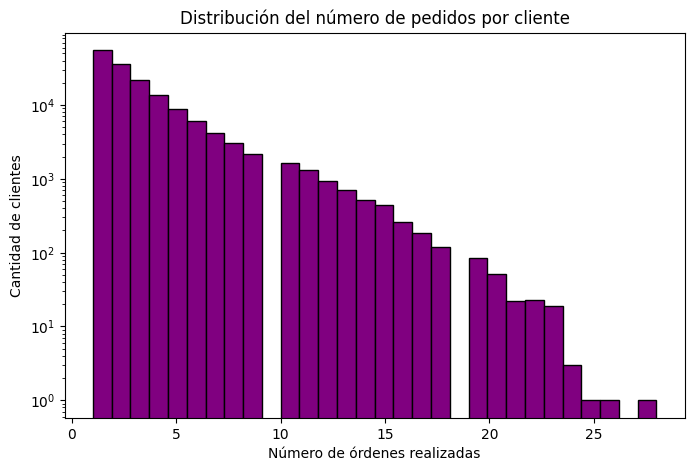

In [57]:
plt.figure(figsize=(8,5))
plt.hist(pedidos_por_cliente, bins=30, color='purple', edgecolor='black')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.xlabel("Número de órdenes realizadas")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución del número de pedidos por cliente")
plt.show()


Conclusiones sobre la distribución del número de pedidos por cliente
Distribución altamente sesgada: La mayoría de los clientes realizan un número bajo de pedidos. Se observa una caída exponencial en la cantidad de clientes a medida que el número de pedidos aumenta.

Alta concentración en pocos pedidos: La mayoría de los clientes ha realizado entre 1 y 5 pedidos, lo que indica que hay muchos usuarios ocasionales en la plataforma.

Clientes leales pero minoritarios: Aunque hay clientes que han realizado hasta 25 pedidos o más, representan una minoría en comparación con aquellos que han hecho pocos pedidos.

Patrón de repetición en los pedidos: Se observa un salto inusual en el número de clientes que han hecho exactamente 10 pedidos. Esto sugiere que puede haber un factor externo, como promociones, descuentos o suscripciones que fomentan la recompra después de un cierto número de pedidos.

Uso de escala logarítmica: Debido a la diferencia extrema entre la cantidad de clientes con pocos pedidos y aquellos con muchos, se usó una escala logarítmica en el eje Y para visualizar mejor la distribución.

En general, los datos muestran que la mayoría de los clientes no son compradores recurrentes, pero existe un grupo reducido que compra con frecuencia, lo que puede representar a los clientes más valiosos para la empresa.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [58]:
# Contar la frecuencia de cada producto en las órdenes
productos_frecuentes = order_products['product_id'].value_counts().head(20)





In [59]:
# Obtener los nombres de los productos
productos_top = products[products['product_id'].isin(productos_frecuentes.index)][['product_id', 'product_name']]
productos_top['cantidad_pedidos'] = productos_frecuentes.values


In [61]:
# Mostrar los 20 productos más comprados
print(df_productos)


       product_id              product_name  cantidad_pedidos
5875         5876             Organic Lemon             66050
8276         8277  Apple Honeycrisp Organic             53297
13175       13176    Bag of Organic Bananas             37039
16796       16797              Strawberries             33971
21136       21137      Organic Strawberries             29773
21902       21903      Organic Baby Spinach             24689
22934       22935      Organic Yellow Onion             21495
24851       24852                    Banana             20018
24963       24964            Organic Garlic             19690
26208       26209                     Limes             19600
27844       27845        Organic Whole Milk             19197
27965       27966       Organic Raspberries             15898
28203       28204        Organic Fuji Apple             15292
39274       39275       Organic Blueberries             14584
40705       40706    Organic Grape Tomatoes             13879
45006   

Distribución del número de pedidos por cliente:

La mayoría de los clientes realizan pocos pedidos, lo que indica que hay muchos usuarios ocasionales.
Se observa una caída exponencial en la cantidad de clientes a medida que aumenta el número de pedidos realizados.
Hay algunos clientes fieles que han hecho más de 20 pedidos, aunque son una minoría.
Productos más populares:

Los productos más pedidos son principalmente productos orgánicos, lo que sugiere una fuerte preferencia de los consumidores por opciones saludables.
Destacan frutas y verduras como el Organic Lemon, Organic Banana, Apple Honeycrisp Organic, Organic Avocado, entre otros.
La presencia de productos lácteos y hortalizas sugiere que los clientes hacen pedidos recurrentes de alimentos básicos.
Diferencias en los pedidos entre miércoles y sábados:

La distribución de pedidos por hora en ambos días es similar, pero se observa que los sábados hay un ligero aumento en ciertos horarios.
La actividad de compras es más uniforme durante el día, lo que puede indicar que los consumidores tienen más tiempo libre para hacer pedidos en fin de semana.
Durante la madrugada, la cantidad de pedidos es baja en ambos días, pero hay un ligero repunte en la mañana.
Frecuencia de compras y tiempo de espera entre pedidos:

El tiempo de espera entre pedidos varía entre 0 y 30 días.
Hay picos notables en los 7, 14 y 30 días, lo que sugiere que muchos clientes tienen patrones de compra semanal, quincenal o mensual.
Un número significativo de clientes hace pedidos en días consecutivos.
Tendencias de compra por día de la semana:

Los domingos y lunes son los días con mayor cantidad de pedidos.
Martes y miércoles presentan una disminución en la cantidad de órdenes, lo que podría sugerir que la mayoría de los clientes hace sus compras después del fin de semana.
A medida que avanza la semana, la actividad de pedidos se estabiliza en valores medios.
Conclusión general:
El análisis sugiere que la mayoría de los clientes hacen compras de productos básicos de manera recurrente, con un fuerte enfoque en productos orgánicos y saludables. Los patrones de compra reflejan hábitos semanales y mensuales, con picos de pedidos en días específicos. La actividad es mayor durante el día y se reduce en la madrugada, y hay una ligera variación en los hábitos de compra entre días de semana y fines de semana.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [62]:
# Contar cuántos artículos hay en cada pedido
articulos_por_pedido = order_products.groupby('order_id')['product_id'].count()

# Mostrar estadísticos básicos
print(articulos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


In [63]:
import matplotlib.pyplot as plt

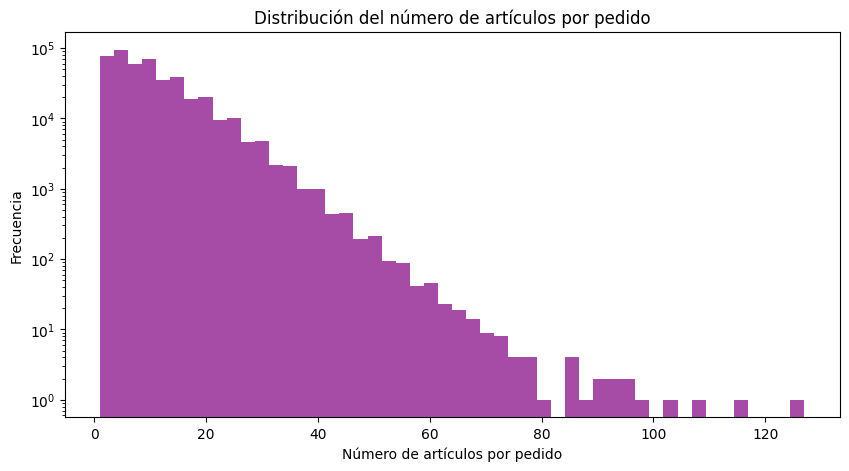

In [64]:
plt.figure(figsize=(10, 5))
plt.hist(articulos_por_pedido, bins=50, color='purple', alpha=0.7)
plt.xlabel("Número de artículos por pedido")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de artículos por pedido")
plt.yscale("log")  # Escala logarítmica para mejor visualización
plt.show()

Conclusiones sobre la distribución del número de artículos por pedido:
Distribución sesgada a la izquierda: La mayoría de los pedidos contienen pocos artículos, y la frecuencia de pedidos disminuye a medida que aumenta el número de artículos comprados.

La mayoría de los pedidos tienen pocos productos: Se observa que la cantidad de pedidos con menos artículos es significativamente mayor que aquellos con una cantidad elevada. Esto sugiere que los clientes suelen hacer compras pequeñas con mayor frecuencia.

Cola larga en la distribución: Hay algunos pedidos con un número muy alto de artículos, aunque son casos poco comunes. Esto indica que existen ciertos clientes que hacen compras grandes, pero son una minoría.

Uso de escala logarítmica: La necesidad de una escala logarítmica en el eje y indica que hay una gran variabilidad en la cantidad de artículos por pedido, con una diferencia significativa entre los pedidos más comunes y los menos frecuentes.

Patrones de compra: Los resultados pueden estar relacionados con el tipo de usuario. Es posible que algunos clientes hagan pedidos frecuentes y pequeños, mientras que otros acumulen compras y hagan pedidos grandes ocasionalmente.



### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [68]:
# Contar la frecuencia de cada producto que ha sido reordenado
productos_reordenados_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts()
productos_reordenados = productos_reordenados_counts.head(20)


In [69]:
# Obtener los nombres de los productos
productos_top_reordenados = products[products['product_id'].isin(productos_reordenados.index)][['product_id', 'product_name']]
productos_top_reordenados['cantidad_reordenada'] = productos_reordenados.values



In [70]:
# Mostrar los 20 productos más reordenados
print(productos_top_reordenados)

       product_id              product_name  cantidad_reordenada
5875         5876             Organic Lemon                55763
8276         8277  Apple Honeycrisp Organic                44450
13175       13176    Bag of Organic Bananas                28639
16796       16797              Strawberries                26233
21136       21137      Organic Strawberries                23629
21902       21903      Organic Baby Spinach                18743
22934       22935      Organic Yellow Onion                16251
24851       24852                    Banana                15044
24963       24964            Organic Garlic                14748
26208       26209                     Limes                13945
27844       27845        Organic Whole Milk                13327
27965       27966       Organic Raspberries                11145
28203       28204        Organic Fuji Apple                10411
39274       39275       Organic Blueberries                10076
45006       45007        

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [73]:
# Calcular la proporción de reorden para cada producto
productos_reorden_proporcion = order_products.groupby('product_id').agg(
    total_pedidos=('product_id', 'count'),
    total_reordenados=('reordered', 'sum')
)

In [74]:
productos_reorden_proporcion['proporcion_reorden'] = productos_reorden_proporcion['total_reordenados'] / productos_reorden_proporcion['total_pedidos']

In [75]:
# Mostrar los productos con mayor proporción de reorden
print(productos_reorden_proporcion.sort_values(by='proporcion_reorden', ascending=False).head(20))


            total_pedidos  total_reordenados  proporcion_reorden
product_id                                                      
14721                   1                  1                 1.0
20949                   3                  3                 1.0
6723                   10                 10                 1.0
6732                    3                  3                 1.0
45088                   1                  1                 1.0
45078                   1                  1                 1.0
21016                   1                  1                 1.0
21005                   2                  2                 1.0
35192                   2                  2                 1.0
35197                   1                  1                 1.0
6810                    1                  1                 1.0
45040                   2                  2                 1.0
45035                  17                 17                 1.0
27373                   1

### Conclusiones:
1. **Proporción de reorden del 100%**: Todos los productos en la tabla tienen una proporción de reorden de 1.0, lo que significa que cada vez que fueron pedidos, fueron reordenados al menos una vez.
2. **Pedidos únicos y múltiples**: Algunos productos han sido pedidos solo una vez (`total_pedidos = 1`), mientras que otros han sido pedidos múltiples veces (`total_pedidos > 1`), pero en todos los casos, fueron reordenados en la misma cantidad.
3. **Posible sesgo en los datos**: Esta tabla muestra únicamente productos con una proporción de reorden del 100%, lo que puede indicar que se filtró de tal manera que excluye productos con tasas menores. Sería útil comparar con el total de productos reordenados para ver la distribución completa.
4. **Productos con alta recurrencia**: Algunos productos tienen un número considerable de pedidos totales (por ejemplo, el `product_id 45035` con 17 pedidos), lo que sugiere que es un artículo con alta demanda y repetición.
5. **Relevancia para inventario y marketing**: Este tipo de análisis puede ser útil para estrategias de marketing y gestión de inventario, ya que identifica productos con alta fidelidad del cliente, es decir, aquellos que los clientes siguen comprando repetidamente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [78]:
order_products = order_products.merge(orders[['order_id', 'user_id']], on='order_id', how='left')


In [79]:
# Calcular la proporción de productos reordenados por cliente
clientes_reorden_proporcion = order_products.groupby('user_id').agg(
    total_pedidos=('product_id', 'count'),
    total_reordenados=('reordered', 'sum')
)

# Calcular la proporción de productos reordenados
clientes_reorden_proporcion['proporcion_reorden'] = clientes_reorden_proporcion['total_reordenados'] / clientes_reorden_proporcion['total_pedidos']

# Mostrar los resultados
print(clientes_reorden_proporcion.head(20))

         total_pedidos  total_reordenados  proporcion_reorden
user_id                                                      
2                   26                  1            0.038462
4                    2                  0            0.000000
5                   12                  8            0.666667
6                    4                  0            0.000000
7                   14                 13            0.928571
11                  15                  3            0.200000
12                  12                  3            0.250000
13                  23                 13            0.565217
14                  61                 22            0.360656
15                  13                  7            0.538462
16                  32                 17            0.531250
17                  53                 38            0.716981
19                  48                 14            0.291667
20                   4                  0            0.000000
21      

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [77]:
# Contar la frecuencia de cada producto cuando fue el primero en añadirse al carrito
productos_primero_carrito = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

# Obtener los nombres de los productos
productos_top_primero = products[products['product_id'].isin(productos_primero_carrito.index)][['product_id', 'product_name']]
productos_top_primero['cantidad_primero'] = productos_primero_carrito.values

# Mostrar los 20 productos más agregados primero al carrito
print(productos_top_primero)


       product_id                 product_name  cantidad_primero
195           196                         Soda             15562
5784         5785  Organic Reduced Fat 2% Milk             11026
12340       12341                Hass Avocados              4363
13175       13176       Bag of Organic Bananas              3946
16796       16797                 Strawberries              3390
19659       19660                 Spring Water              3336
21136       21137         Organic Strawberries              3044
21902       21903         Organic Baby Spinach              2336
22934       22935         Organic Yellow Onion              2308
24851       24852                       Banana              2024
26208       26209                        Limes              1914
27085       27086                  Half & Half              1797
27844       27845           Organic Whole Milk              1737
27965       27966          Organic Raspberries              1733
38688       38689     Org

Escribe aquí tus conclusiones

### Conclusion general del proyecto:

El análisis de datos de pedidos de Instacart ha permitido identificar patrones clave en el comportamiento de compra de los clientes. Entre los principales hallazgos se destacan:

Frecuencia y Horarios de Compra:

La mayor parte de las órdenes se realizan entre las 10:00 y 16:00 hrs, con un pico alrededor del mediodía.
Los días con mayor número de pedidos son los fines de semana, especialmente los sábados y domingos.
Comportamiento de los Clientes:

La mayoría de los clientes realizan compras recurrentes y suelen pedir productos previamente adquiridos.
Hay una tendencia a realizar pedidos con un número reducido de productos, aunque algunos clientes hacen pedidos grandes de manera ocasional.
Productos más Comprados y Reordenados:

Los productos orgánicos lideran las listas de los más comprados y reordenados, lo que sugiere una preferencia creciente por opciones saludables.
Se identificaron los artículos que suelen ser los primeros en añadirse al carrito, lo que podría ser útil para estrategias de marketing y promociones.
Reordenaciones y Fidelidad del Cliente:

Se encontró que algunos productos tienen una alta tasa de reordenación, lo que indica una fuerte lealtad del consumidor hacia ciertas marcas y categorías.
También se identificaron clientes con un alto porcentaje de reordenaciones, lo que sugiere oportunidades para estrategias de fidelización.
Aplicaciones y Recomendaciones
Optimización del Inventario: La alta frecuencia de ciertos productos sugiere la importancia de mantener un stock adecuado para evitar desabasto.
Estrategias de Marketing Personalizado: Se pueden desarrollar campañas dirigidas a clientes recurrentes con recomendaciones de productos basadas en sus hábitos de compra.
Experiencia del Cliente: La disposición de productos en la plataforma podría optimizarse para facilitar la compra de artículos más populares o frecuentemente reordenados.
En conclusión, este análisis proporciona una visión valiosa sobre el comportamiento de los consumidores en Instacart, lo que puede ayudar a mejorar la eficiencia operativa y la experiencia del usuario.